# Plotly 한번에 제대로 배우기
From [Suanlab](https://www.youtube.com/watch?v=i-xbj0owgEE)

## Plotly 특징

* 인터랙티브 그래프 생성
* JSON 데이터 형식으로 저장
* 벡터 이미지, 래스터 이미지로 Export 가능

In [1]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

import pandas as pd
import numpy as np
from urllib.request import urlopen
import json

## Plotly 차트

### 산점도(Scatter Plots)

In [2]:
iris = px.data.iris()
iris

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

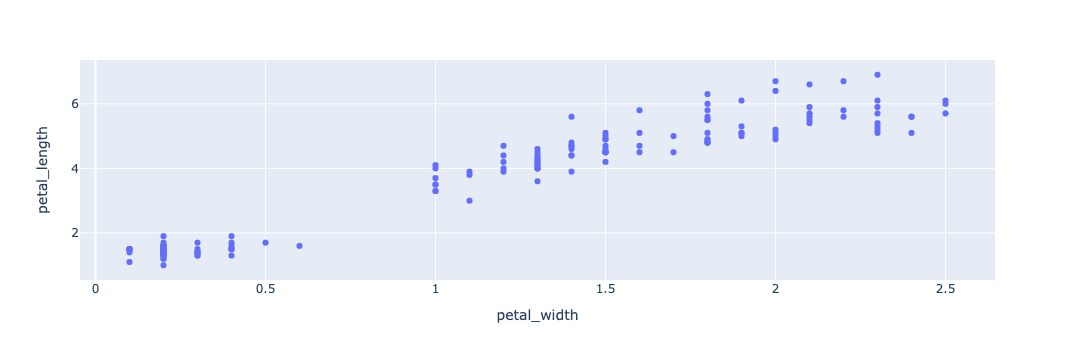

In [3]:
fig = px.scatter(iris, x='petal_width', y='petal_length')
fig.show()

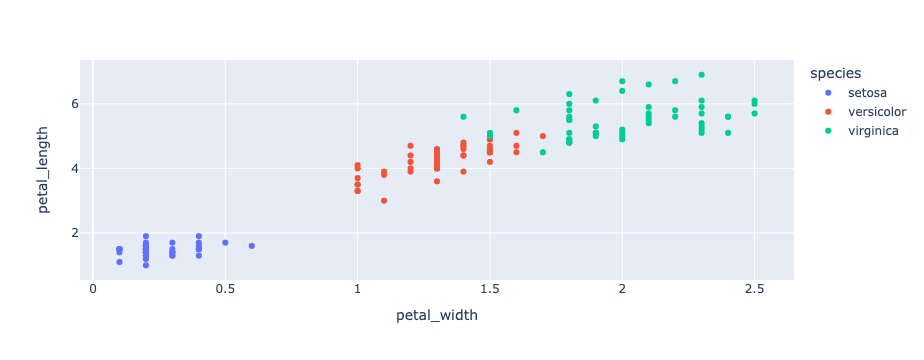

In [4]:
fig = px.scatter(iris, x='petal_width', y='petal_length', color='species')
fig.show()

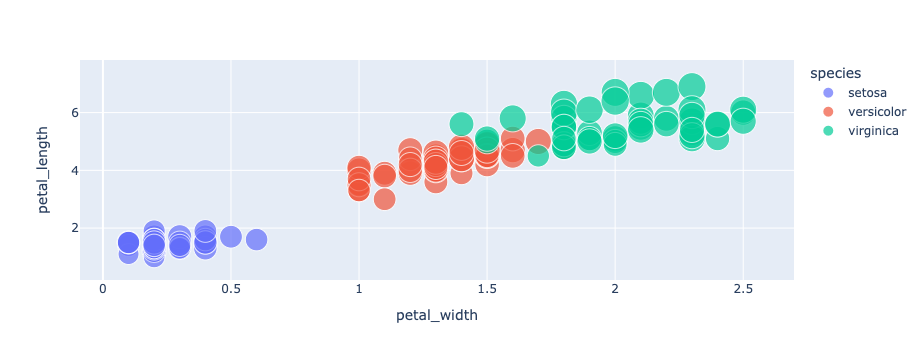

In [5]:
fig = px.scatter(iris, x='petal_width', y='petal_length',
                color='species', size='sepal_length',
                hover_data=['sepal_width'])
fig.show()

In [6]:
tips = px.data.tips()
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

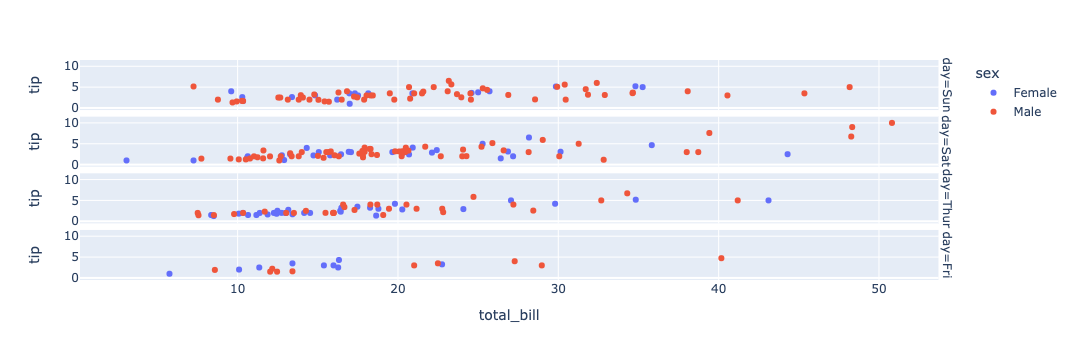

In [7]:
fig = px.scatter(tips, x='total_bill', y='tip', color='sex', facet_row='day')
fig.show()

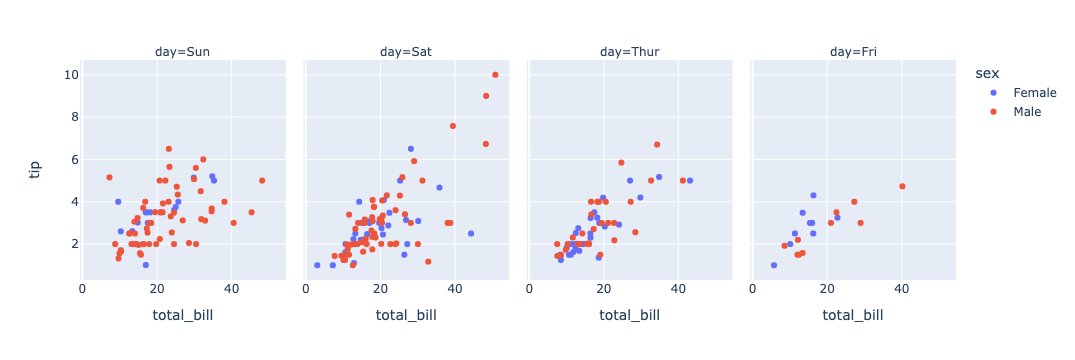

In [8]:
fig = px.scatter(tips, x='total_bill', y='tip', color='sex', facet_col='day')
fig.show()

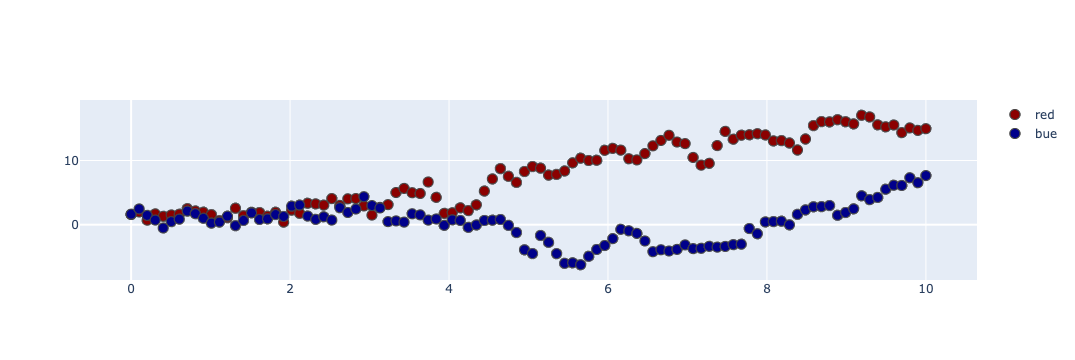

In [9]:
t = np.linspace(0, 10, 100)
y1 = np.random.randn(100).cumsum()
y2 = np.random.randn(100).cumsum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=y1, name='red',mode='markers', marker_color='darkred'))
fig.add_trace(go.Scatter(x=t, y=y2, name='bue',mode='markers', marker_color='darkblue'))
fig.update_traces(mode='markers', marker_line_width=1, marker_size=10)
fig.show()



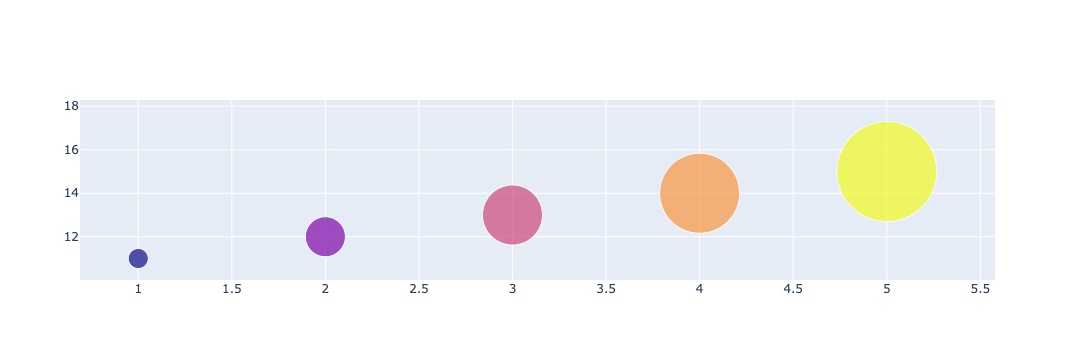

In [10]:
#bubble scatter chart
fig = go.Figure(data=go.Scatter(x=[1,2,3,4,5], y=[11,12,13,14,15],
                                mode='markers', marker=dict(size=[20,40,60,80,100],
                                                            color=[1,2,3,4,5])))
fig.show()


In [11]:
gapminder = px.data.gapminder()
gapminder

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

In [12]:
gapminder_2007 = gapminder.query("year == 2007")
gapminder_2007

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

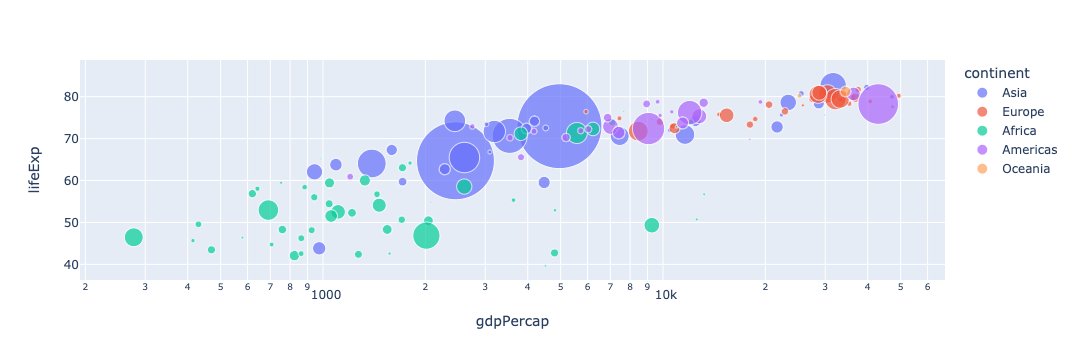

In [13]:
fig = px.scatter(gapminder_2007, x='gdpPercap', y='lifeExp', size='pop', color='continent',
                 hover_name='country', log_x=True, size_max=60)
fig.show()
#log_scale도가능

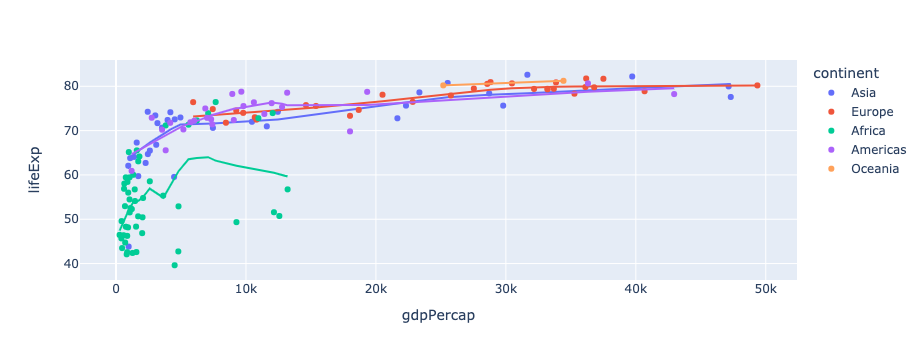

In [14]:
fig = px.scatter(gapminder_2007, x='gdpPercap', y='lifeExp', color='continent',
                trendline='lowess')
fig.show()

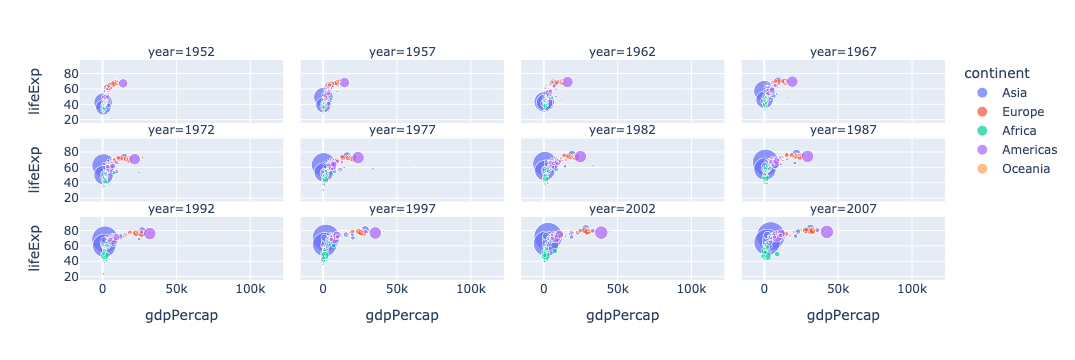

In [15]:
fig = px.scatter(gapminder, x='gdpPercap', y='lifeExp', size='pop', color='continent',
                 facet_col='year',facet_col_wrap=4)
fig.show()

### 산점도 매트릭스(Scatter Matrix)

In [ ]:
fig = px.scatter_matrix(iris,
                       dimensions=['petal_width', 'petal_length',
                                   'sepal_width', 'sepal_length'],
                       color='species')
fig.show()

In [ ]:
fig = px.scatter_matrix(tips, dimensions=['total_bill','tip', 'day', 'size'],
                        color='sex')
fig.show()

### 라인 플롯(Line Plots)

In [ ]:
t = np.linspace(0, np.pi**2, 100)
fig = px.line(x=t, y=np.cos(t), labels={'x':'time', 'y':'cos(t)'})
fig.show()

In [ ]:
gapminder_asia = gapminder.query("continent =='Asia'")
gapminder_asia

In [ ]:
fig = px.line(gapminder_asia, x='year', y='lifeExp', color='country')
fig.show()

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([1,3,2,3,1])
fig= go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, name='linear', line_shape='linear'))
fig.add_trace(go.Scatter(x=x, y=y+10, name='spline', hoverinfo='text+name', line_shape='spline'))
fig.add_trace(go.Scatter(x=x, y=y+20, name='vhv', line_shape='vhv'))
fig.add_trace(go.Scatter(x=x, y=y+30, name='hvh', line_shape='hvh'))
fig.add_trace(go.Scatter(x=x, y=y+40, name='vh', line_shape='vh'))
fig.add_trace(go.Scatter(x=x, y=y+50, name='hv', line_shape='hv'))
fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))
fig.show()

# 보간법 기본 리니어 포인트마다 직선연결
# spline 스무싱하게 약간 유선
# vhv 첫번째와 두번쨰 중간값으로 vertical 나눔
# hvh 첫번째와 두번째 horizontal
# vh 먼저올리고감 hv는 가서 올림

In [ ]:
N =100
x= np.linspace(0,1,N)
y0 = np.random.randn(N) +5
y1 = np.random.randn(N)
y2 = np.random.randn(N) -5

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y = y0, mode='markers', name='markers'))
fig.add_trace(go.Scatter(x=x, y = y1, mode='lines+markers', name='lines+markers'))
fig.add_trace(go.Scatter(x=x, y = y2, mode='lines', name='lines'))
fig.show()


### 시계열(Time Series)

* https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv

In [ ]:
aapl = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
aapl

In [ ]:
fig = px.line(aapl, x='Date', y='AAPL.Close')
fig.show()
#시간축만 존재해야함

In [ ]:
fig = px.line(aapl, x='Date', y='AAPL.Close',range_x=['2016-02-01','2017-02-27'])
fig.show()

In [ ]:
fig = px.line(aapl, x='Date', y='AAPL.Close',range_x=['2016-02-01','2017-02-27'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()
#slider 추가

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=aapl['Date'],open=aapl['AAPL.Open'],
                                     high=aapl['AAPL.High'],
                                     low=aapl['AAPL.Low'],
                                     close=aapl['AAPL.Close'])])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=aapl['Date'],open=aapl['AAPL.Open'],
                                     high=aapl['AAPL.High'],
                                     low=aapl['AAPL.Low'],
                                     close=aapl['AAPL.Close'],
                                    increasing_line_color='red',
                                    decreasing_line_color='blue')])
fig.show()

### 면적도(Area Plots)

In [ ]:
fig = px.area(gapminder, x='year', y='pop', color='continent', line_group='country')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5], y=[0,2,3,5,2], fill='tozeroy'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5], y=[2,3,3,2,4], fill='tonexty'))
fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5], y=[0,2,3,5,2],
                         fill='tozeroy', mode='none'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5], y=[2,3,3,2,4], 
                         fill='tonexty', mode='none'))
fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5], y=[0,2,3,5,2],
                         fill='none', mode='lines', line_color='indigo'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5], y=[2,3,3,2,4], 
                         fill='tonexty', mode='lines', line_color='indigo'))
fig.show()

In [ ]:
x = ['Winter', 'Spring', 'Summer', 'Fall']

fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=[30, 40, 50, 30],
                         hoverinfo='x+y',
                         mode='lines',
                         line=dict(width=0.5, color='skyblue'),
                         stackgroup='one'))
fig.add_trace(go.Scatter(x=x, y=[20, 20, 10, 20],
                         hoverinfo='x+y',
                         mode='lines',
                         line=dict(width=0.5, color='cyan'),
                         stackgroup='one'))
fig.add_trace(go.Scatter(x=x, y=[40, 10, 20, 10],
                         hoverinfo='x+y',
                         mode='lines',
                         line=dict(width=0.5, color='royalblue'),
                         stackgroup='one'))
fig.update_layout(yaxis_range=(0,100))
fig.show()


In [ ]:
fig.add_trace(go.Scatter(x=x, y=[100, 100, 100, 100],
                         hoverinfo='x+y',
                         mode='lines',
                         line=dict(width=0.5, color='purple'),
                         stackgroup='one'))
fig.update_layout(showlegend=True,
                  xaxis_type='category',
                  yaxis=dict(type='linear',
                             range=[1,100],
                             ticksuffix='%'))
fig.show()

### 막대 차트(Bar Charts)

In [ ]:
gapminder_korea = gapminder.query("country == 'Korea, Rep.'")
gapminder_korea

In [ ]:
fig = px.bar(gapminder_korea, x='year', y='pop')
fig.show()

In [ ]:
fig = px.bar(gapminder_korea, x='year', y='pop',
            hover_data=['lifeExp', 'gdpPercap'],
            color='lifeExp', height=400)
fig.show()

In [ ]:
fig = px.bar(tips, x='sex', y='total_bill', color='time')
fig.show()

In [ ]:
fig = px.bar(tips, x='sex', y='total_bill', color='smoker',
            barmode='group', height=400)
fig.show()

In [ ]:
fig = px.bar(tips, x='sex', y='total_bill', color='smoker',
            barmode='group', facet_row='time',facet_col='day',
             category_orders={'day':['Thur','Fri','Sat','Sun'],
                              'time':['Lunch','Dinner']})
fig.show()

In [ ]:
fig = px.bar(tips, x='total_bill', y='day', orientation='h')
fig.show()

In [ ]:
fig = px.bar(tips, x='total_bill', y='sex', color='day',orientation='h',hover_data=['tip','size'],height=400)
fig.show()

In [ ]:
colors =['darkgray'] * 5
colors[1] = 'royalblue'
colors[3] = 'limegreen'

fig = go.Figure(data=[go.Bar(x=['A', 'B', 'C', 'D', 'E'],
                             y=[20, 14, 23, 25, 22],
                             marker_color=colors)])
fig.update_layout()




In [ ]:
fig = go.Figure(data=[go.Bar(x=[1, 3, 5.1, 6.9, 9.5],
                             y=[6, 8, 3, 5, 4],
                             width=[1, 2.1, 0.8, 2.6, 1.4])])
fig.show()

In [ ]:
years = ['2018', '2019', '2020']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=[25000000, 20000000, 30000000],
                     base=[-25000000, -20000000, -30000000],
                     marker_color='crimson',
                     name='지출'))
fig.add_trace(go.Bar(x=years, y=[35000000, 40000000, 50000000],
                     base=0,
                     marker_color='limegreen',
                     name='수입'))
fig.show()

In [ ]:
x = [1, 2, 3, 4]
y1 = np.random.randint(1, 10, 5)
y2 = np.random.randint(1, 10, 5)
y3 = np.random.randint(1, 10, 5)
y4 = np.random.randint(1, 10, 5)

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y1))
fig.add_trace(go.Bar(x=x, y=y2))
fig.add_trace(go.Bar(x=x, y=y3))
fig.add_trace(go.Bar(x=x, y=y4))
fig.update_layout(barmode='relative')
fig.show()




In [ ]:
mx=[['A','A', 'B','B'],
    [5, 10, 15, 20]]

fig = go.Figure()
fig.add_trace(go.Bar(x=mx, y=y1))
fig.add_trace(go.Bar(x=mx, y=y2))
fig.add_trace(go.Bar(x=mx, y=y3))
fig.add_trace(go.Bar(x=mx, y=y4))
fig.update_layout(barmode='relative')
fig.show()

In [ ]:
a = ['C', 'A', 'B', 'D']

fig = go.Figure()
fig.add_trace(go.Bar(x=a, y=y1))
fig.add_trace(go.Bar(x=a, y=y2))
fig.add_trace(go.Bar(x=a, y=y3))
fig.add_trace(go.Bar(x=a, y=y4))
fig.update_layout(barmode='stack',
                 xaxis={'categoryorder':'category ascending'})
fig.show()

In [ ]:
fig.update_layout(barmode='stack',
                 xaxis={'categoryorder':'array',
                        'categoryarray':['D','A','C','B']})
fig.show()

In [ ]:
fig.update_layout(barmode='stack',
                 xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[1, 2, 3, 4, 5],
                                y=[3, 4, 2 ,5, 2],
                                error_y=dict(type='data',
                                             array=[1, 0.5, 0.6, 0.3, 0.5],
                                             visible=True)))
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[1, 2, 3, 4, 5],
                                y=[3, 4, 2 ,5, 2],
                                error_y=dict(type='data',
                                             array=[1, 0.5, 0.6, 0.3, 0.5],
                                             visible=True)))
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[1, 2, 3, 4, 5],
                                y=[3, 4, 2 ,5, 2],
                                error_y=dict(type='data',
                                             array=[1, 0.5, 0.6, 0.3, 0.5],
                                             arrayminus=[0.3, 0.4, 1.2, 0.4,1],
                                             visible=True)))
fig.show()

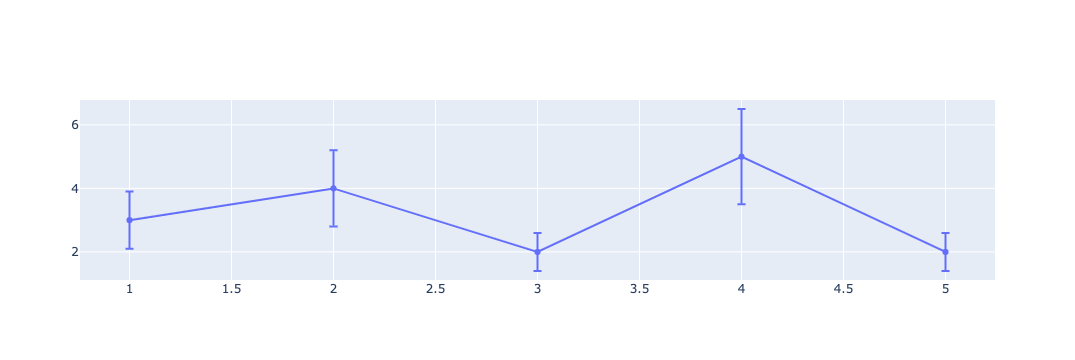

In [54]:
fig = go.Figure(data=go.Scatter(x=[1, 2, 3, 4, 5],
                                y=[3, 4, 2 ,5, 2],
                                error_y=dict(type='percent',
                                             value=30,
                                             visible=True)))
fig.show()

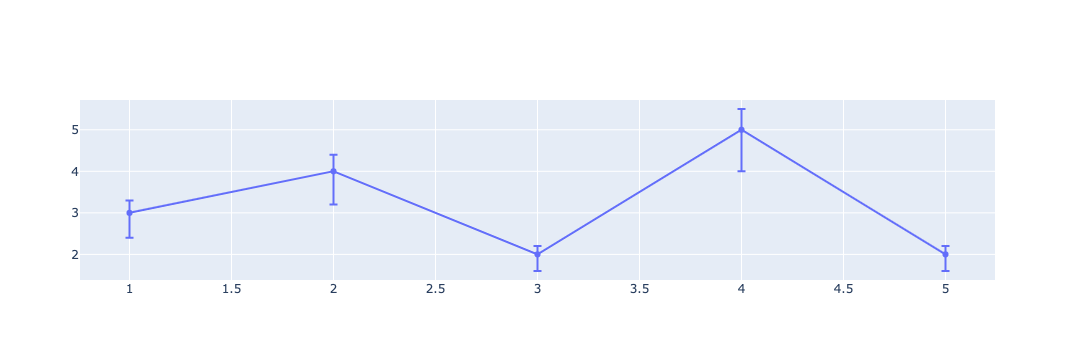

In [55]:
fig = go.Figure(data=go.Scatter(x=[1, 2, 3, 4, 5],
                                y=[3, 4, 2 ,5, 2],
                                error_y=dict(type='percent',
                                             symmetric=False,
                                             value=10,
                                             valueminus=20,
                                             visible=True)))
fig.show()

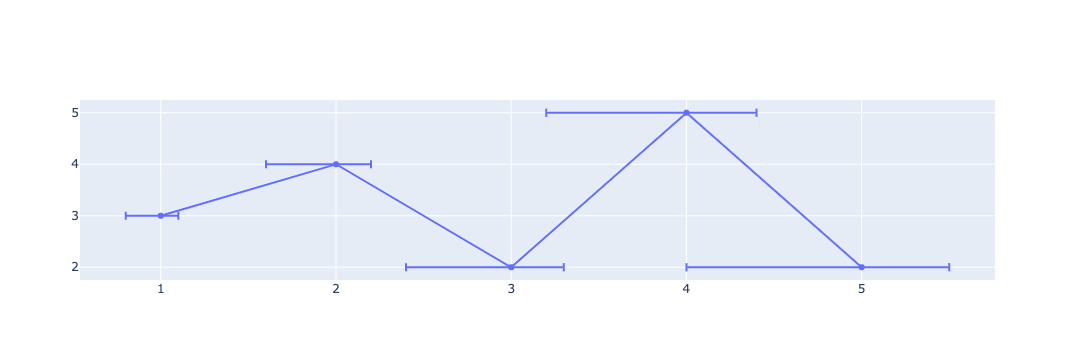

In [56]:
fig = go.Figure(data=go.Scatter(x=[1, 2, 3, 4, 5],
                                y=[3, 4, 2 ,5, 2],
                                error_x=dict(type='percent',
                                             symmetric=False,
                                             value=10,
                                             valueminus=20,
                                             visible=True)))
fig.show()

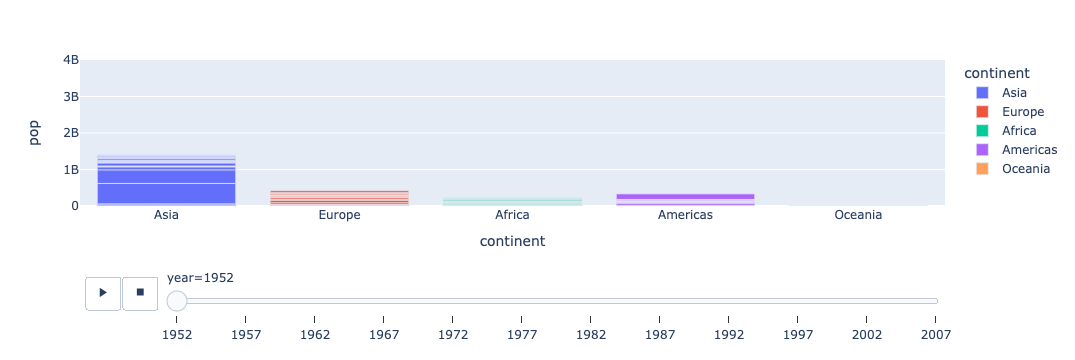

In [57]:
fig = px.bar(gapminder, x='continent', y='pop', color='continent', animation_frame='year',
             animation_group='country', range_y=[0,4000000000])
fig.show()


### 박스 플롯(Box Plots)

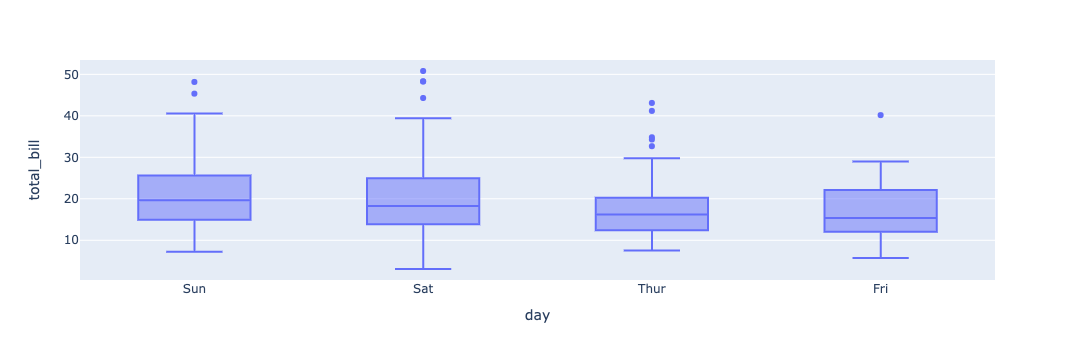

In [58]:
fig = px.box(tips, x='day', y='total_bill')
fig.show()

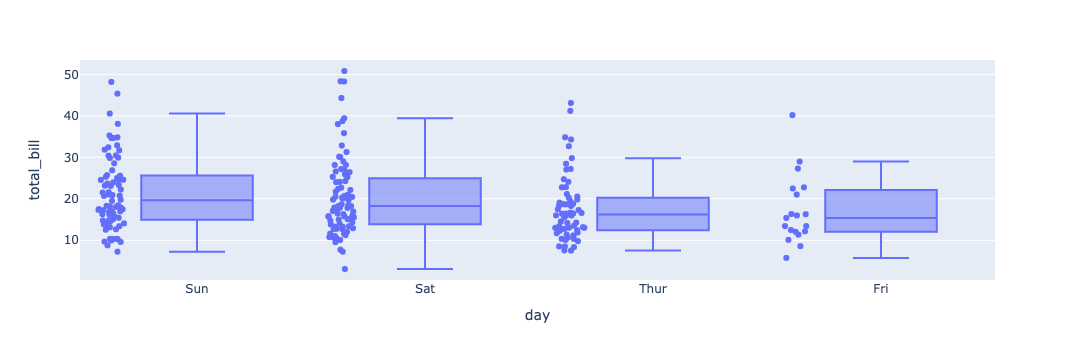

In [59]:
fig = px.box(tips, x='day', y='total_bill', points='all')
fig.show()

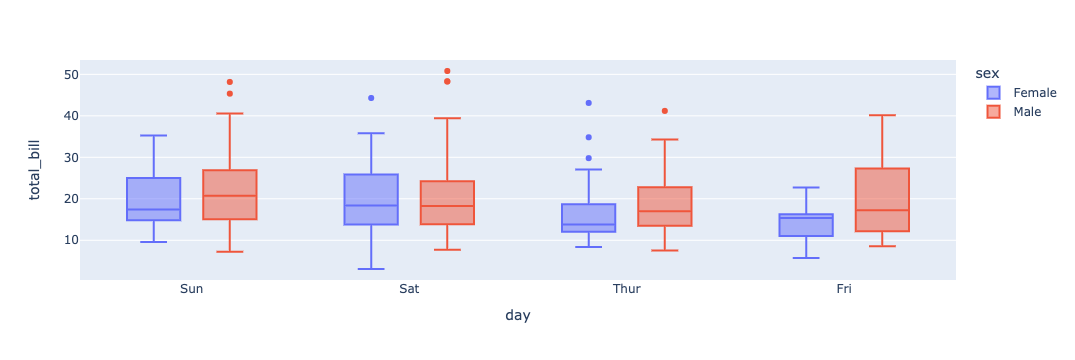

In [60]:
fig = px.box(tips, x='day', y='total_bill', color='sex')
fig.show()

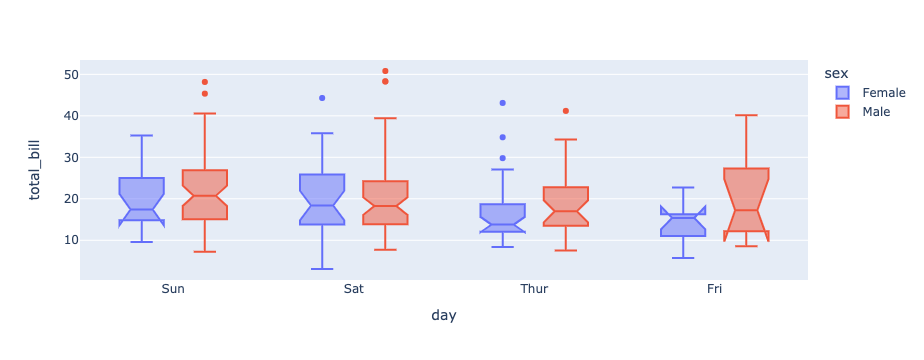

In [61]:
fig = px.box(tips, x='day', y='total_bill', color='sex',
            notched=True, hover_data=['time'])
fig.show()

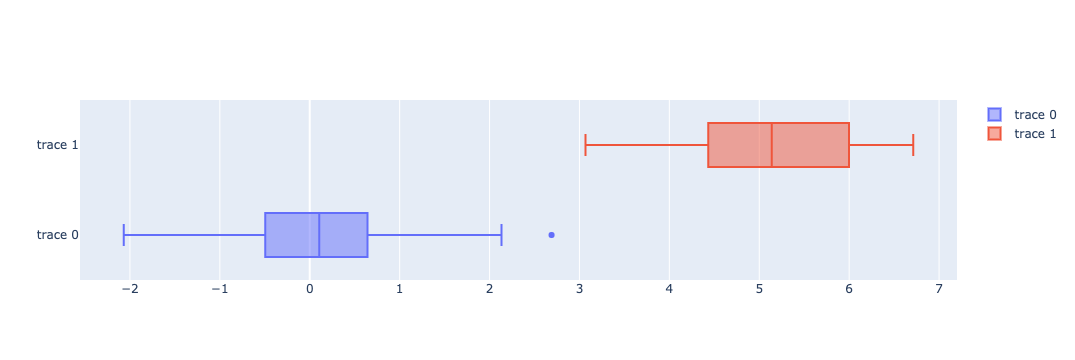

In [62]:
x1 = np.random.randn(50)
x2 = np.random.randn(50) +5

fig = go.Figure()
fig.add_trace(go.Box(x=x1))
fig.add_trace(go.Box(x=x2))
fig.show()

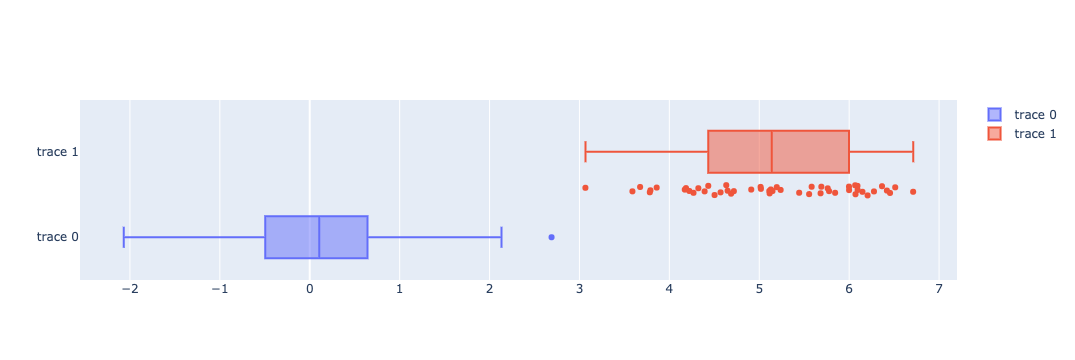

In [63]:
fig = go.Figure()
fig.add_trace(go.Box(x=x1))
fig.add_trace(go.Box(x=x2, boxpoints='all', jitter=0.3, pointpos=-1.8))
# jitter 겹치는게 없이 퍼져보이게 0.3만큼만 위치를 1.8만큼 밑으로 

fig.show()

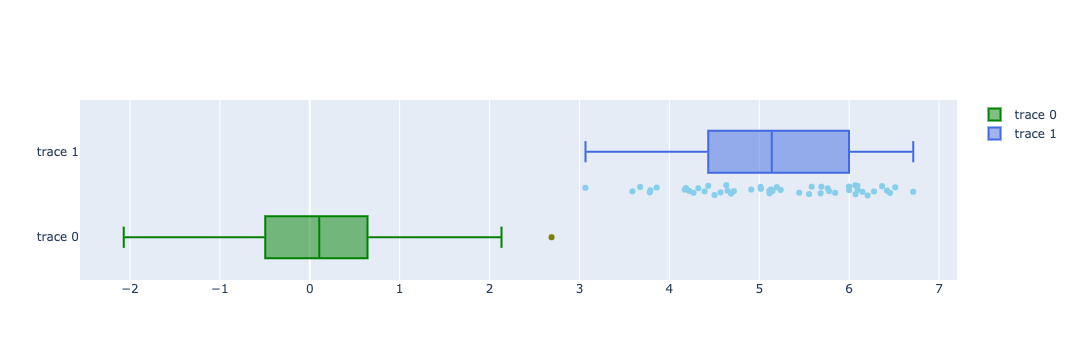

In [64]:
fig = go.Figure()
fig.add_trace(go.Box(x=x1, marker_color='olive', line_color='green'))
fig.add_trace(go.Box(x=x2, boxpoints='all', jitter=0.3, pointpos=-1.8,
                    marker_color='skyblue', line_color='royalblue'))
# jitter 겹치는게 없이 퍼져보이게 0.3만큼만 위치를 1.8만큼 밑으로 

fig.show()

### 바이올린 플롯(Violin Plot)

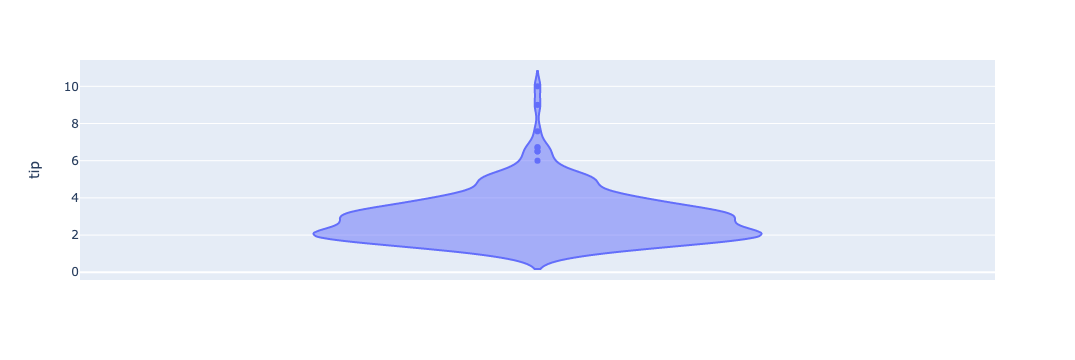

In [65]:
fig = px.violin(tips, y='tip')
fig.show()

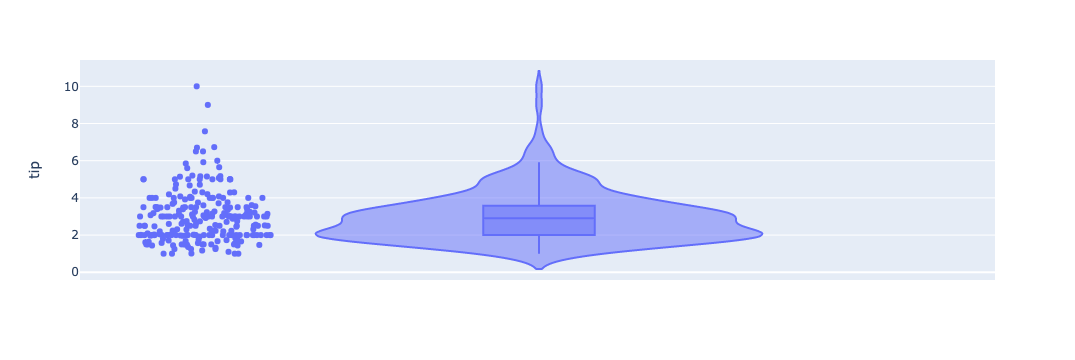

In [66]:
fig = px.violin(tips, y='tip', box=True, points='all')
fig.show()

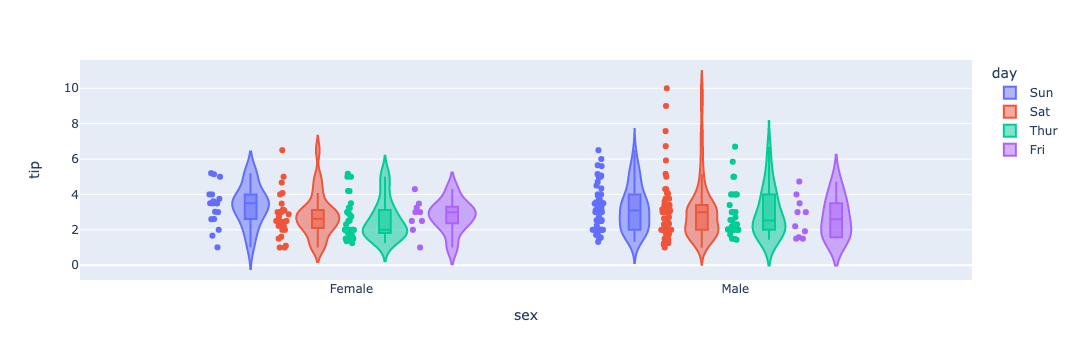

In [67]:
fig = px.violin(tips, y='tip', x='sex', color='day', hover_data=tips.columns,box=True, points='all')
fig.show()

### 히스토그램(Histogram)

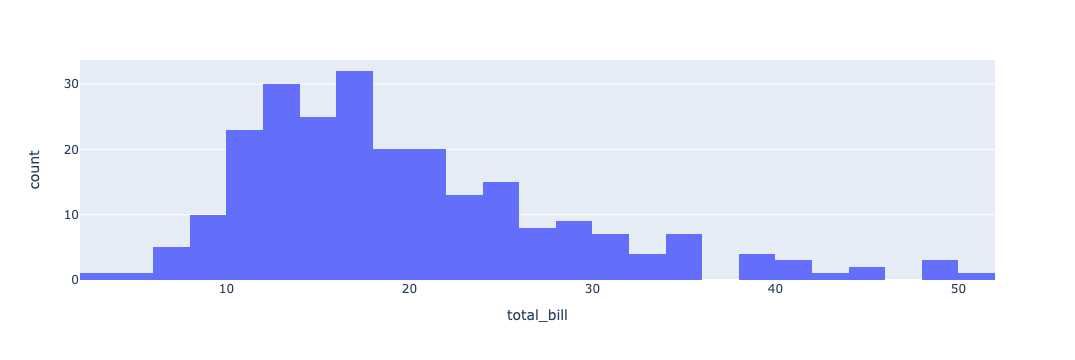

In [68]:
fig = px.histogram(tips, x='total_bill')
fig.show()

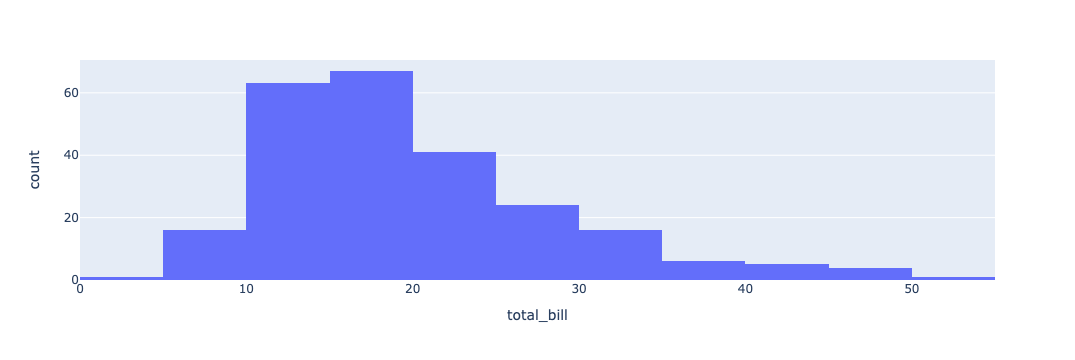

In [69]:
fig = px.histogram(tips, x='total_bill', nbins=20)
fig.show()

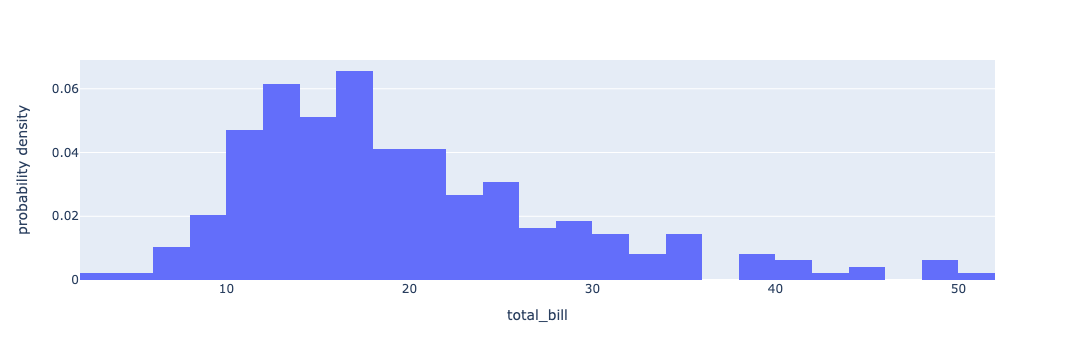

In [70]:
fig = px.histogram(tips, x='total_bill', histnorm='probability density')
fig.show()

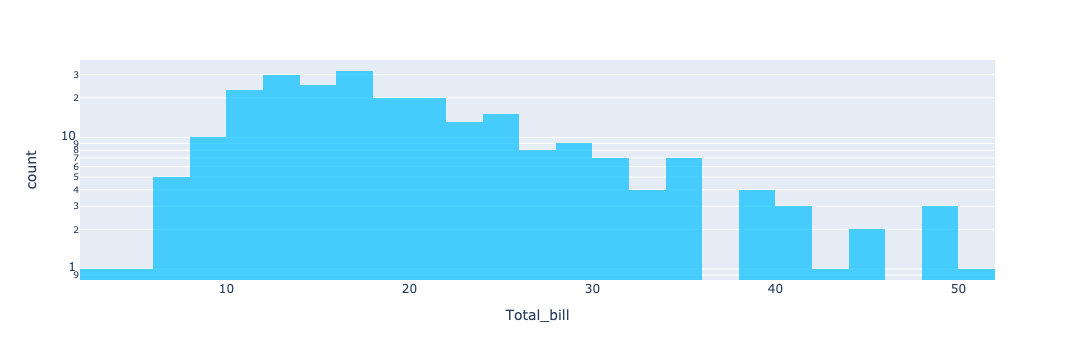

In [71]:
fig = px.histogram(tips, x='total_bill',
                  labels={'total_bill':'Total_bill'},
                  opacity=0.7, log_y=True,
                  color_discrete_sequence=['deepskyblue'])
#opacity 불투명도, log_y스케일로 색깔도변환

fig.show()

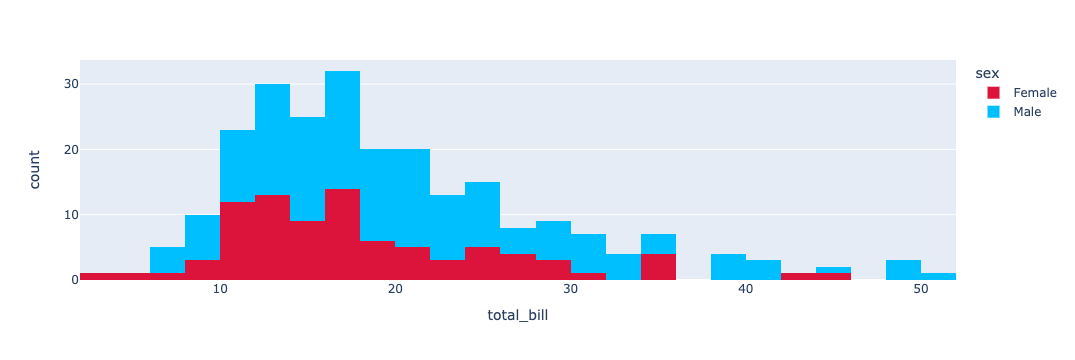

In [72]:
fig = px.histogram(tips, x='total_bill', color='sex',
                  color_discrete_sequence=['crimson','deepskyblue'])
fig.show()

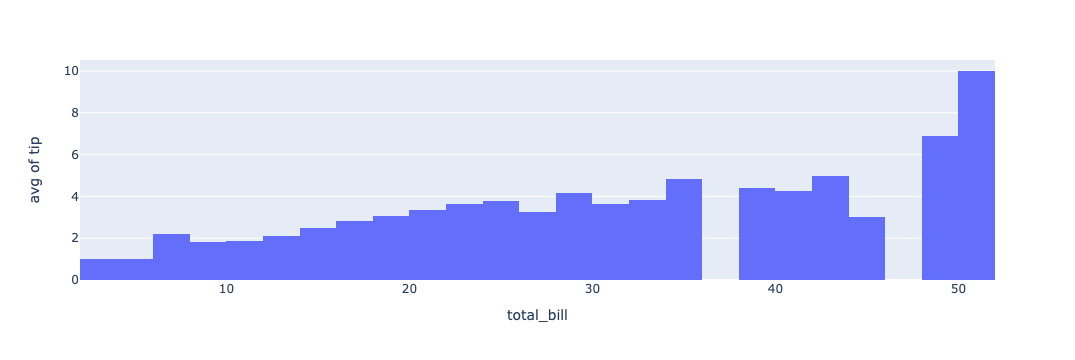

In [73]:
fig = px.histogram(tips, x='total_bill', y='tip', histfunc='avg')
# 기본은 count인데 avg로 바꿈
fig.show()

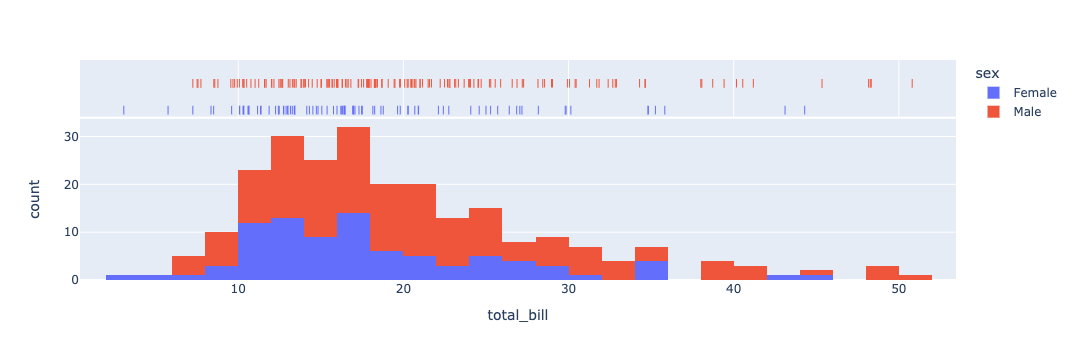

In [74]:
fig = px.histogram(tips, x='total_bill', color='sex', marginal='rug',
                  hover_data=tips.columns)
fig.show()

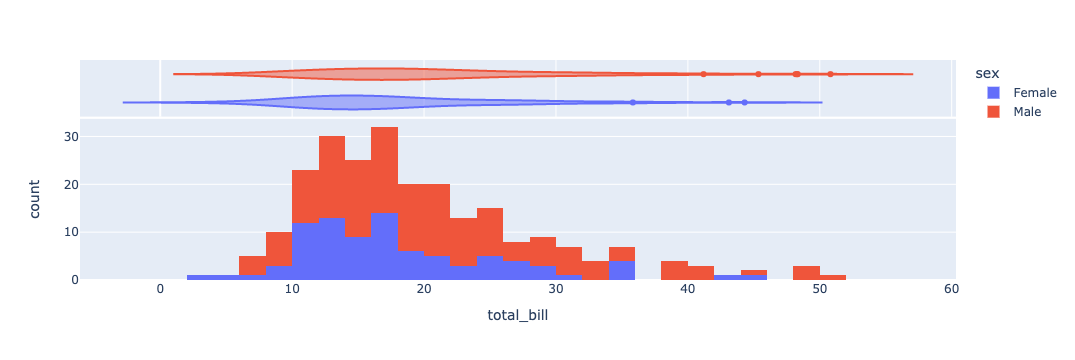

In [75]:
fig = px.histogram(tips, x='total_bill', color='sex', marginal='violin',
                  hover_data=tips.columns)
fig.show()

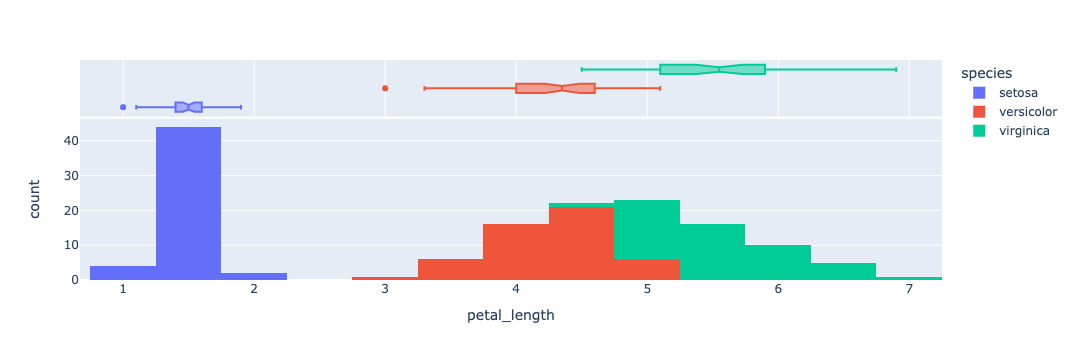

In [76]:
fig = px.histogram(iris, x='petal_length', color='species', marginal='box')
fig.show()

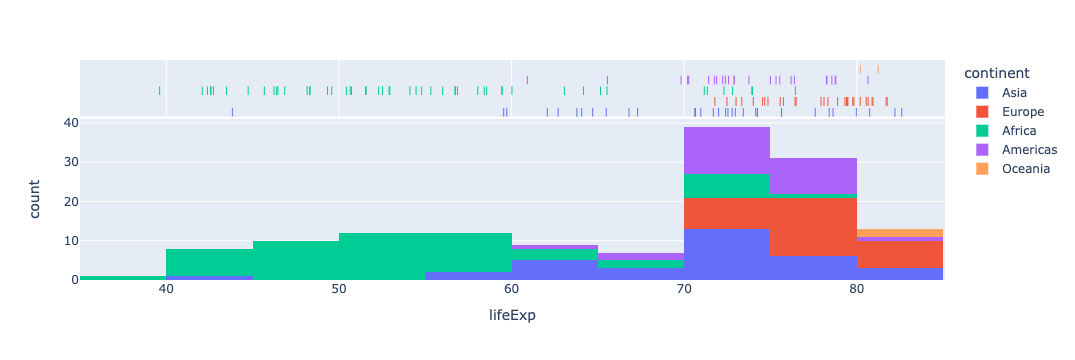

In [77]:
fig = px.histogram(gapminder_2007, x='lifeExp', color='continent', marginal='rug',
                   hover_name='country')
fig.show()

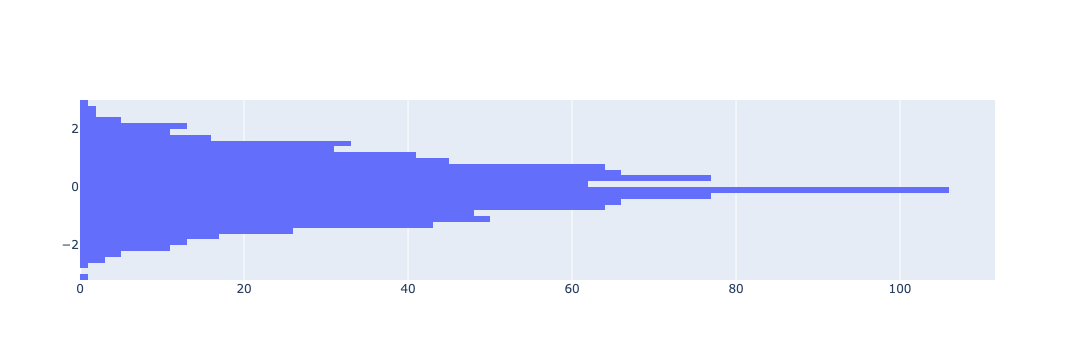

In [78]:
n1 = np.random.randn(1000)
n2 = np.random.randn(1000) + 1

fig = go.Figure(data=[go.Histogram(y=n1)])
fig.show()


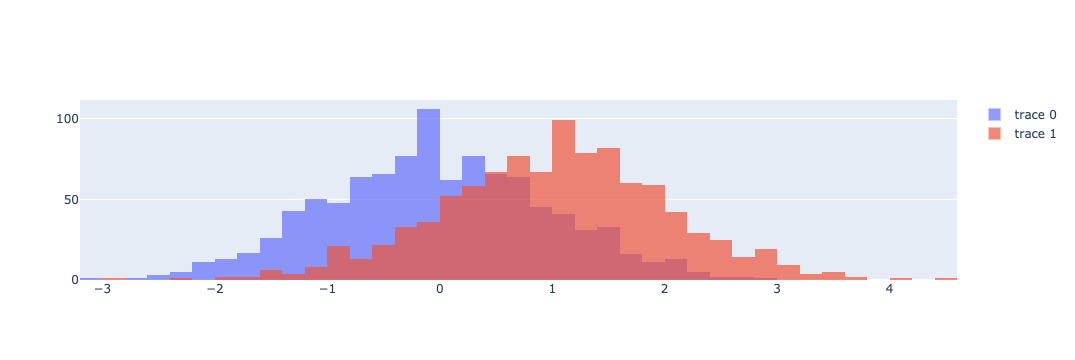

In [79]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=n1))
fig.add_trace(go.Histogram(x=n2))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.7)
fig.show()



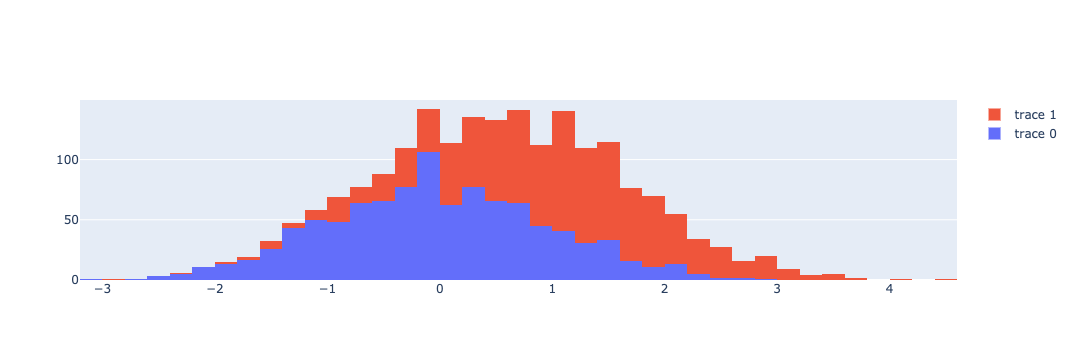

In [80]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=n1))
fig.add_trace(go.Histogram(x=n2))
fig.update_layout(barmode='stack')
fig.show()


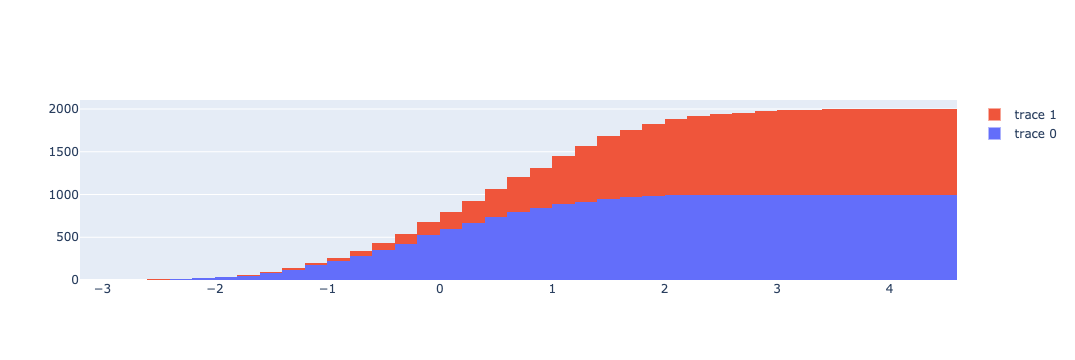

In [81]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=n1, cumulative_enabled=True))
fig.add_trace(go.Histogram(x=n2, cumulative_enabled=True))
fig.update_layout(barmode='stack')

fig.show()


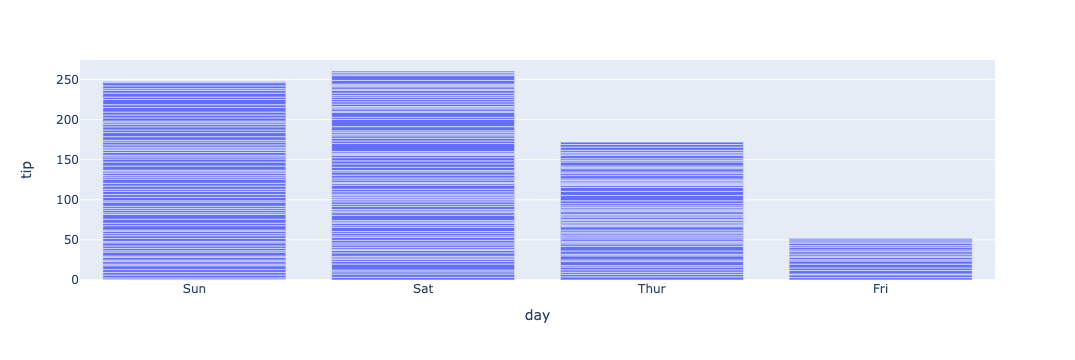

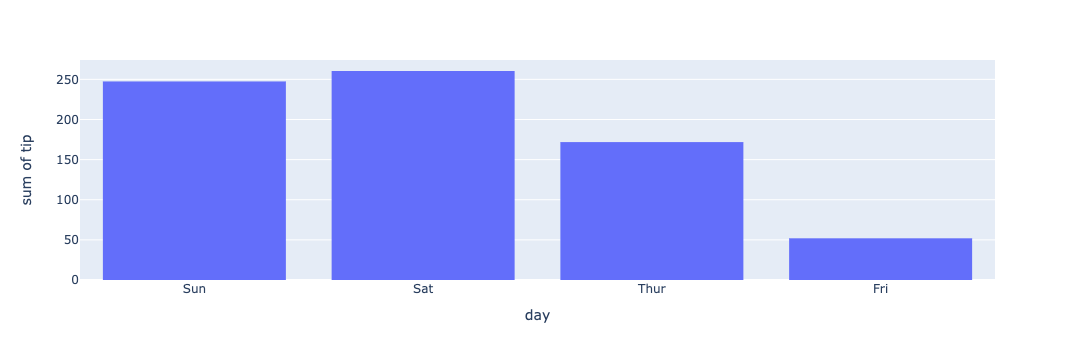

In [82]:
fig1 = px.bar(tips, x='day', y='tip', height=300)
fig1.show()

fig2 = px.histogram(tips, x='day', y='tip', histfunc='sum', height=300)
fig2.show()


### 분포도(Distribution Plot)

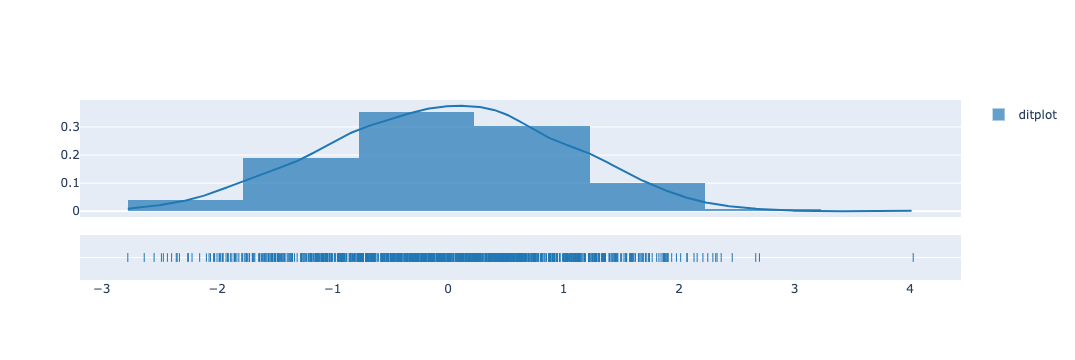

In [83]:
x = np.random.randn(1000)
hist_data = [x]
group_labels = ['ditplot']

fig = ff.create_distplot(hist_data, group_labels)
fig.show()



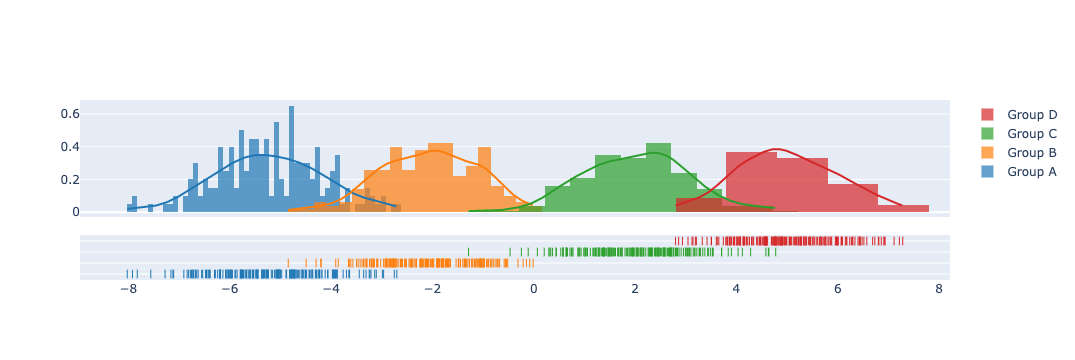

In [84]:
x1 = np.random.randn(200) - 5
x2 = np.random.randn(200) - 2
x3 = np.random.randn(200) + 2
x4 = np.random.randn(200) + 5

hist_data = [x1, x2, x3, x4]
group_labels = ['Group A', 'Group B','Group C','Group D']
fig = ff.create_distplot(hist_data, group_labels, bin_size=[0.1, 0.25, 0.5, 1])
# binsize 다르게 show_hist show_curve,show_rug False 주면 각각 안보이게할수있음 
fig.show()



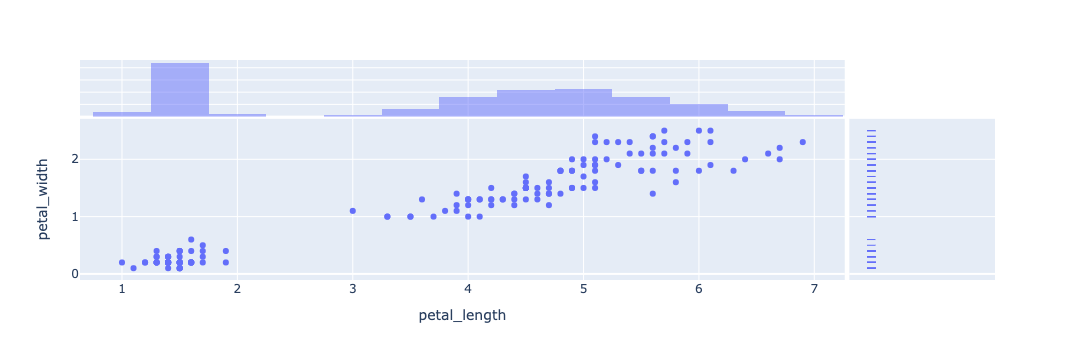

In [85]:
fig = px.scatter(iris, x='petal_length', y='petal_width',
                 marginal_x='histogram', marginal_y='rug')
fig.show()

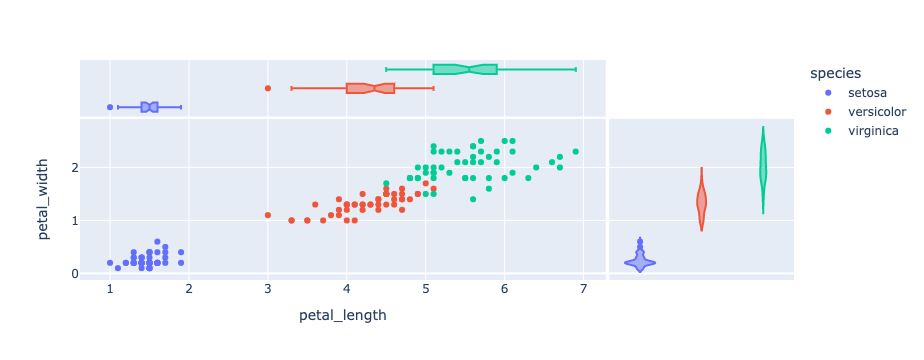

In [86]:
fig = px.scatter(iris, x='petal_length', y='petal_width', color='species',
                 marginal_x='box', marginal_y='violin')
fig.show()



---

